In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For 1 parameter

In [2]:
n = 100                                       # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1000])                          # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1200])                        # density of fault
beta_deg = np.random.uniform(1,89,n)          # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,1)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/965903265.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/965903265.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/965903265.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


In [3]:
data = {'beta': beta_deg}

for i, xi in enumerate(x):
    data[f'g_{i}'] = g[:, i]

df = pd.DataFrame(data)

df["g_5000"].fillna(df["g_5000"].mean(), inplace=True)

X = df.drop(columns=['beta'])   # Features
y = df[['beta']]                # Target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_test = lr_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

In [5]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1000])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1200])                   # density of fault
beta_deg = np.array([53])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,1)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/1738515740.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/1738515740.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/1738515740.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


In [6]:
g_test[:,5000] = (g_test[:,4999]+g_test[:,5001])/2

new_data = np.array(g_test)
new_data = new_data.reshape(1,len(x))
new_df = pd.DataFrame(new_data, columns=[f'g_{i}' for i in range(len(x))])

In [7]:
new_predictions = lr_model.predict(new_df)
print("Prediction using Linear Regression:", new_predictions)

Prediction using Linear Regression: [[53.]]


In [8]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1000])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1200])                   # density of fault
beta_deg = np.array([52.99999999])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,100)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test_lr = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/1694486765.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/1694486765.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/1694486765.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


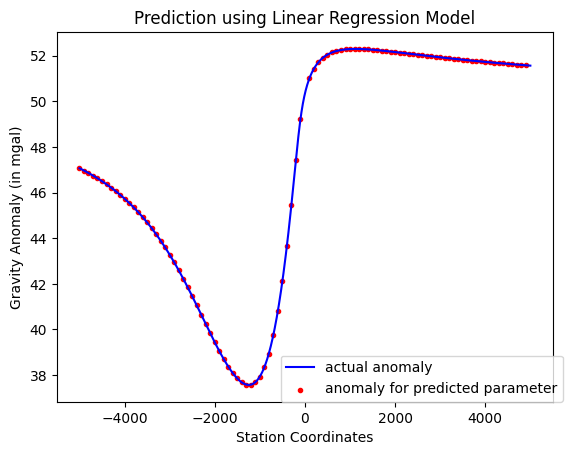

In [9]:
x = np.arange(-5000,5000,1)
plt.plot(x, g_test[0,:], 'b', label='actual anomaly')  
x = np.arange(-5000,5000,100)
plt.scatter(x, g_test_lr[0,:], color='r', marker='.', label='anomaly for predicted parameter') 
plt.title("Prediction using Linear Regression Model")
plt.xlabel("Station Coordinates")
plt.ylabel("Gravity Anomaly (in mgal)")

plt.legend(loc='lower right', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/1926283551.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [11]:
new_predictions = rf_model.predict(new_df)
print("Prediction using Random Forest:", new_predictions)

Prediction using Random Forest: [52.33852581]


In [12]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1000])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1200])                   # density of fault
beta_deg = np.array([53.43038276])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,100)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test_rf = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2281062376.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2281062376.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2281062376.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


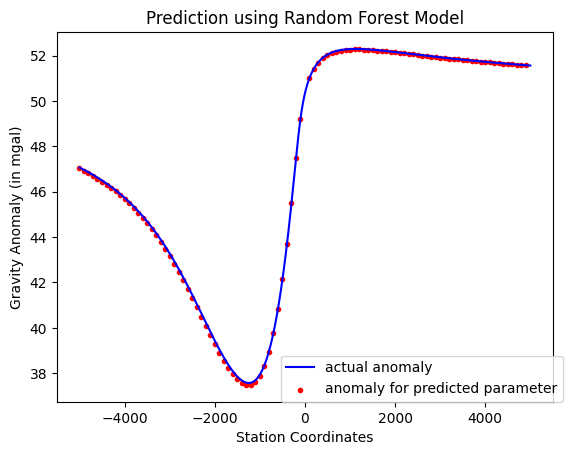

In [13]:
x = np.arange(-5000,5000,1)
plt.plot(x, g_test[0,:], 'b', label='actual anomaly')  
x = np.arange(-5000,5000,100)
plt.scatter(x, g_test_rf[0,:], color='r', marker='.', label='anomaly for predicted parameter')  
plt.title("Prediction using Random Forest Model")
plt.xlabel("Station Coordinates")
plt.ylabel("Gravity Anomaly (in mgal)")

plt.legend(loc='lower right', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

# For 2 parameters

In [14]:
n = 100                                       # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.random.uniform(500,1500,n)             # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = 1500                                    # density of fault
beta_deg = np.random.uniform(5,85,n)          # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,1)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g = 2*G*rho*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/144461132.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/144461132.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/144461132.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


In [15]:
data = {'beta': beta_deg, 
        't' : t}

for i, xi in enumerate(x):
    data[f'g_{i}'] = g[:, i]

df = pd.DataFrame(data)

df["g_5000"].fillna(df["g_5000"].mean(), inplace=True)

X = df.drop(columns=['beta','t'])   # Features
y = df[['beta','t']]                # Target variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_test = lr_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

In [17]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1073.265])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1500])                   # density of fault
beta_deg = np.array([47.34])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,1)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/385141508.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/385141508.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/385141508.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


In [18]:
g_test[:,5000] = (g_test[:,4999]+g_test[:,5001])/2

new_data = np.array(g_test)
new_data = new_data.reshape(1,len(x))
new_df = pd.DataFrame(new_data, columns=[f'g_{i}' for i in range(len(x))])

In [19]:
new_predictions = lr_model.predict(new_df)
print("Prediction using Linear Regression:", new_predictions)

Prediction using Linear Regression: [[  47.34  1073.265]]


In [20]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1073.265])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1500])                   # density of fault
beta_deg = np.array([47.34])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,100)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test_lr = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2664618224.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2664618224.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2664618224.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


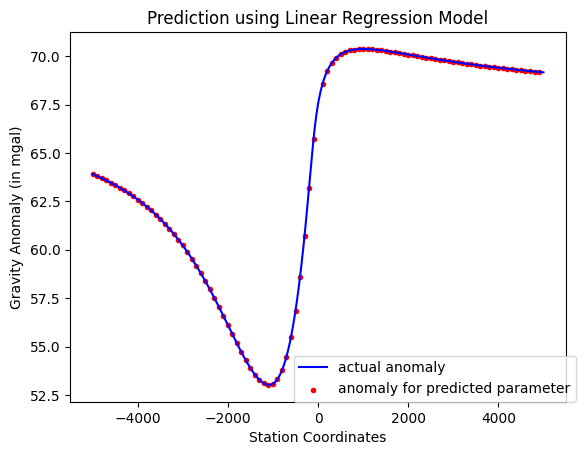

In [21]:
x = np.arange(-5000,5000,1)
plt.plot(x, g_test[0,:], 'b', label='actual anomaly')  
x = np.arange(-5000,5000,100)
plt.scatter(x, g_test_lr[0,:], color='r', marker='.', label='anomaly for predicted parameter') 
plt.title("Prediction using Linear Regression Model")
plt.xlabel("Station Coordinates")
plt.ylabel("Gravity Anomaly (in mgal)")

plt.legend(loc='lower right', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

In [23]:
new_predictions = rf_model.predict(new_df)
print("Prediction using Random Forest:", new_predictions)

Prediction using Random Forest: [[  36.80261259 1056.39776641]]


In [24]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1072.42846566])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1500])                   # density of fault
beta_deg = np.array([45.18188976])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,100)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test_rf = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

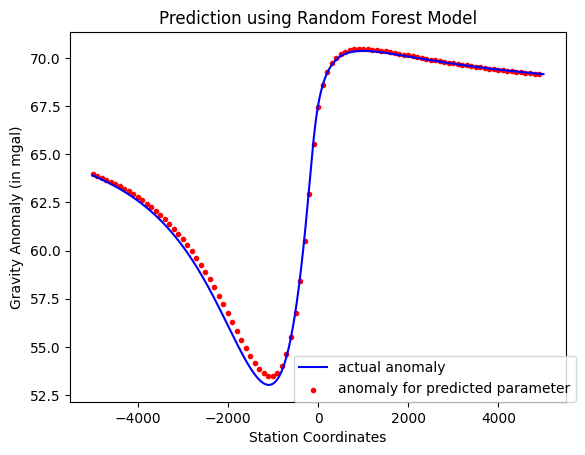

In [25]:
x = np.arange(-5000,5000,1)
plt.plot(x, g_test[0,:], 'b', label='actual anomaly')  
x = np.arange(-5000,5000,100)
plt.scatter(x, g_test_rf[0,:], color='r', marker='.', label='anomaly for predicted parameter')  
plt.title("Prediction using Random Forest Model")
plt.xlabel("Station Coordinates")
plt.ylabel("Gravity Anomaly (in mgal)")

plt.legend(loc='lower right', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

# For 3 parameters

In [26]:
n = 100                                       # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.random.uniform(500,1000,n)             # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.random.uniform(1000,3000,n)          # density of fault
beta_deg = np.random.uniform(1,89,n)          # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,1)                   # location of data collection
o = np.zeros((len(beta),len(x)))

theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/3421922648.py:19: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/3421922648.py:19: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/3421922648.py:19: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


In [27]:
data = {'beta': beta_deg, 
        't' : t,
        'rho' : rho}
for i, xi in enumerate(x):
    data[f'g_{i}'] = g[:, i]

df = pd.DataFrame(data)

df["g_5000"].fillna(df["g_5000"].mean(), inplace=True)

X = df.drop(columns=['beta','t','rho'])   # Features
y = df[['beta','t','rho']]                # Target variable

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_test = lr_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

In [30]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([1035])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1453])                   # density of fault
beta_deg = np.array([53])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,1)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/3931660455.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/3931660455.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/3931660455.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


In [31]:
g_test[:,5000] = (g_test[:,4999]+g_test[:,5001])/2

new_data = np.array(g_test)
new_data = new_data.reshape(1,len(x))
new_df = pd.DataFrame(new_data, columns=[f'g_{i}' for i in range(len(x))])

In [32]:
new_predictions = lr_model.predict(new_df)
print("Prediction using Linear Regression:", new_predictions)

Prediction using Linear Regression: [[ 145.85902609  706.7309869  1453.0000001 ]]


In [33]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([934.49889563])                    # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1453.00000001])                   # density of fault
beta_deg = np.array([49.3297634])              # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,100)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test_lr = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2834427876.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2834427876.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/2834427876.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


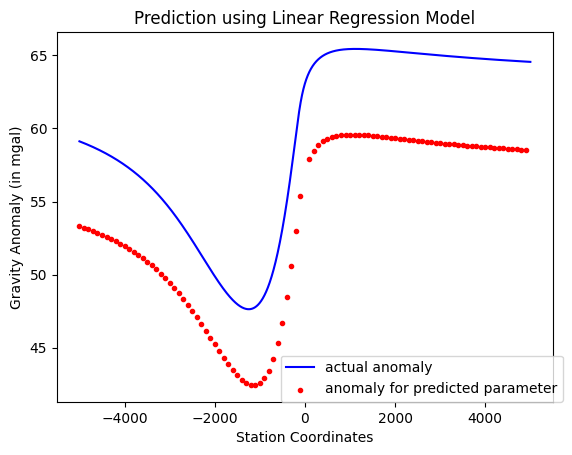

In [34]:
x = np.arange(-5000,5000,1)
plt.plot(x, g_test[0,:], 'b', label='actual anomaly')  
x = np.arange(-5000,5000,100)
plt.scatter(x, g_test_lr[0,:], color='r', marker='.', label='anomaly for predicted parameter') 
plt.title("Prediction using Linear Regression Model")
plt.xlabel("Station Coordinates")
plt.ylabel("Gravity Anomaly (in mgal)")

plt.legend(loc='lower right', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

In [36]:
new_predictions = rf_model.predict(new_df)
print("Prediction using Random Forest:", new_predictions)

Prediction using Random Forest: [[  28.53515783  812.64071398 1869.04526219]]


In [37]:
n = 1                                      # number of training data
G = 6.676*(10**-11)                           # gravitational constant
t = np.array([871.75695058])             # thickness of faulted block
z = np.array([100,1300,600,1800])             # depth of fault boundaries from surface
rho = np.array([1732.005438])          # density of fault
beta_deg = np.array([42.57694195])          # angle of fault plane from vertical
beta = np.radians(beta_deg)                   # convert to radians
x = np.arange(-5000,5000,100)                   # location of data collection
o = np.zeros((len(beta),len(x)))
theta = np.zeros((len(beta), len(x), 4))
psi = np.zeros_like(theta)
f = np.zeros_like(theta)
g = np.zeros_like(o)

for i in range(4):
    theta[:,:,i] = np.arctan((x/z[i])+np.tan(beta[:, None]))
    psi[:,:,i] = theta[:,:,i] - beta[:, None]
    f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
o = f[:,:,1]-f[:,:,0]-f[:,:,3]+f[:,:,2]
g_test_rf = 2*G*rho[:,None]*((np.pi)*t[:, None] + x*(np.cos(beta[:, None]))**2*o)*10**5

/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/350227379.py:18: RuntimeWarning: divide by zero encountered in divide
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/350227379.py:18: RuntimeWarning: invalid value encountered in multiply
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))
/var/folders/w4/wtwmzt5d0gx0gyrxd10k0y880000gp/T/ipykernel_4070/350227379.py:18: RuntimeWarning: divide by zero encountered in log
  f[:,:,i] = psi[:,:,i]*(1/np.tan(psi[:,:,i])) - np.log(np.abs(np.sin(psi[:,:,i])))


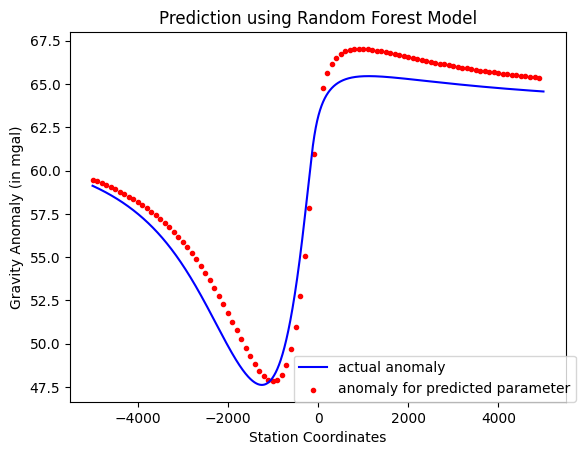

In [38]:
x = np.arange(-5000,5000,1)
plt.plot(x, g_test[0,:], 'b', label='actual anomaly')  
x = np.arange(-5000,5000,100)
plt.scatter(x, g_test_rf[0,:], color='r', marker='.', label='anomaly for predicted parameter')  
plt.title("Prediction using Random Forest Model")
plt.xlabel("Station Coordinates")
plt.ylabel("Gravity Anomaly (in mgal)")

plt.legend(loc='lower right', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()